# Mounting my Google Drive as a workspace

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# Cloning YOLOv7 and installing requirements

In [ ]:
!git clone https://github.com/augmentedstartups/yolov7.git

In [ ]:
# !pip install numpy

In [ ]:
# %cd /content/gdrive/MyDrive
%cd yolov7
!pip install -r requirements.txt
!pip install roboflow

# Installing dataset directly from Roboflow
Or we can also upload it manually to the directory

In [ ]:
!pwd

In [ ]:
# %cd /content/gdrive/MyDrive/yolov7

from roboflow import Roboflow
rf = Roboflow(api_key="BwXJGIF4PyPURTjVcg0y")
project = rf.workspace("yolo-bkh56").project("signlanguage-hcsec")
dataset = project.version(3).download("yolov7")

In [ ]:
# %cd /content/gdrive/MyDrive/yolov7

# Downloading pre-defined weights

In [ ]:
%%bash
# wget -P /content/gdrive/MyDrive/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

In [ ]:
# %cd /content/gdrive/MyDrive/yolov7

# Training

In [ ]:
%cd yolov7

In [ ]:
!pwd

In [ ]:
# !python train.py --batch 16 --cfg cfg/training/yolov7.yaml --epochs 50 --data {dataset.location}/data.yaml --weights 'yolov7.pt' --device 0 
# !python train.py --batch 16 --cfg cfg/training/yolov7.yaml --epochs 1 --data signlanguage-3/data.yaml --weights 'yolov7.pt' --device 0
!python train.py --img 640 --batch 4 --cfg cfg/training/yolov7.yaml --epochs 60 --data signlanguage-3/data.yaml --weights 'yolov7.pt' --cache --device 0

# F1, Precision, and confusion matrix

We see our F1 accuracy is around 69%, could be improved with more training data, and epochs, and also data augmentation.

In [1]:
!pip install ipykernel --upgrade

In [4]:
!cd yolov7

d:\Dp1\Dp1\yolov7


d:\Dp1\Dp1\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


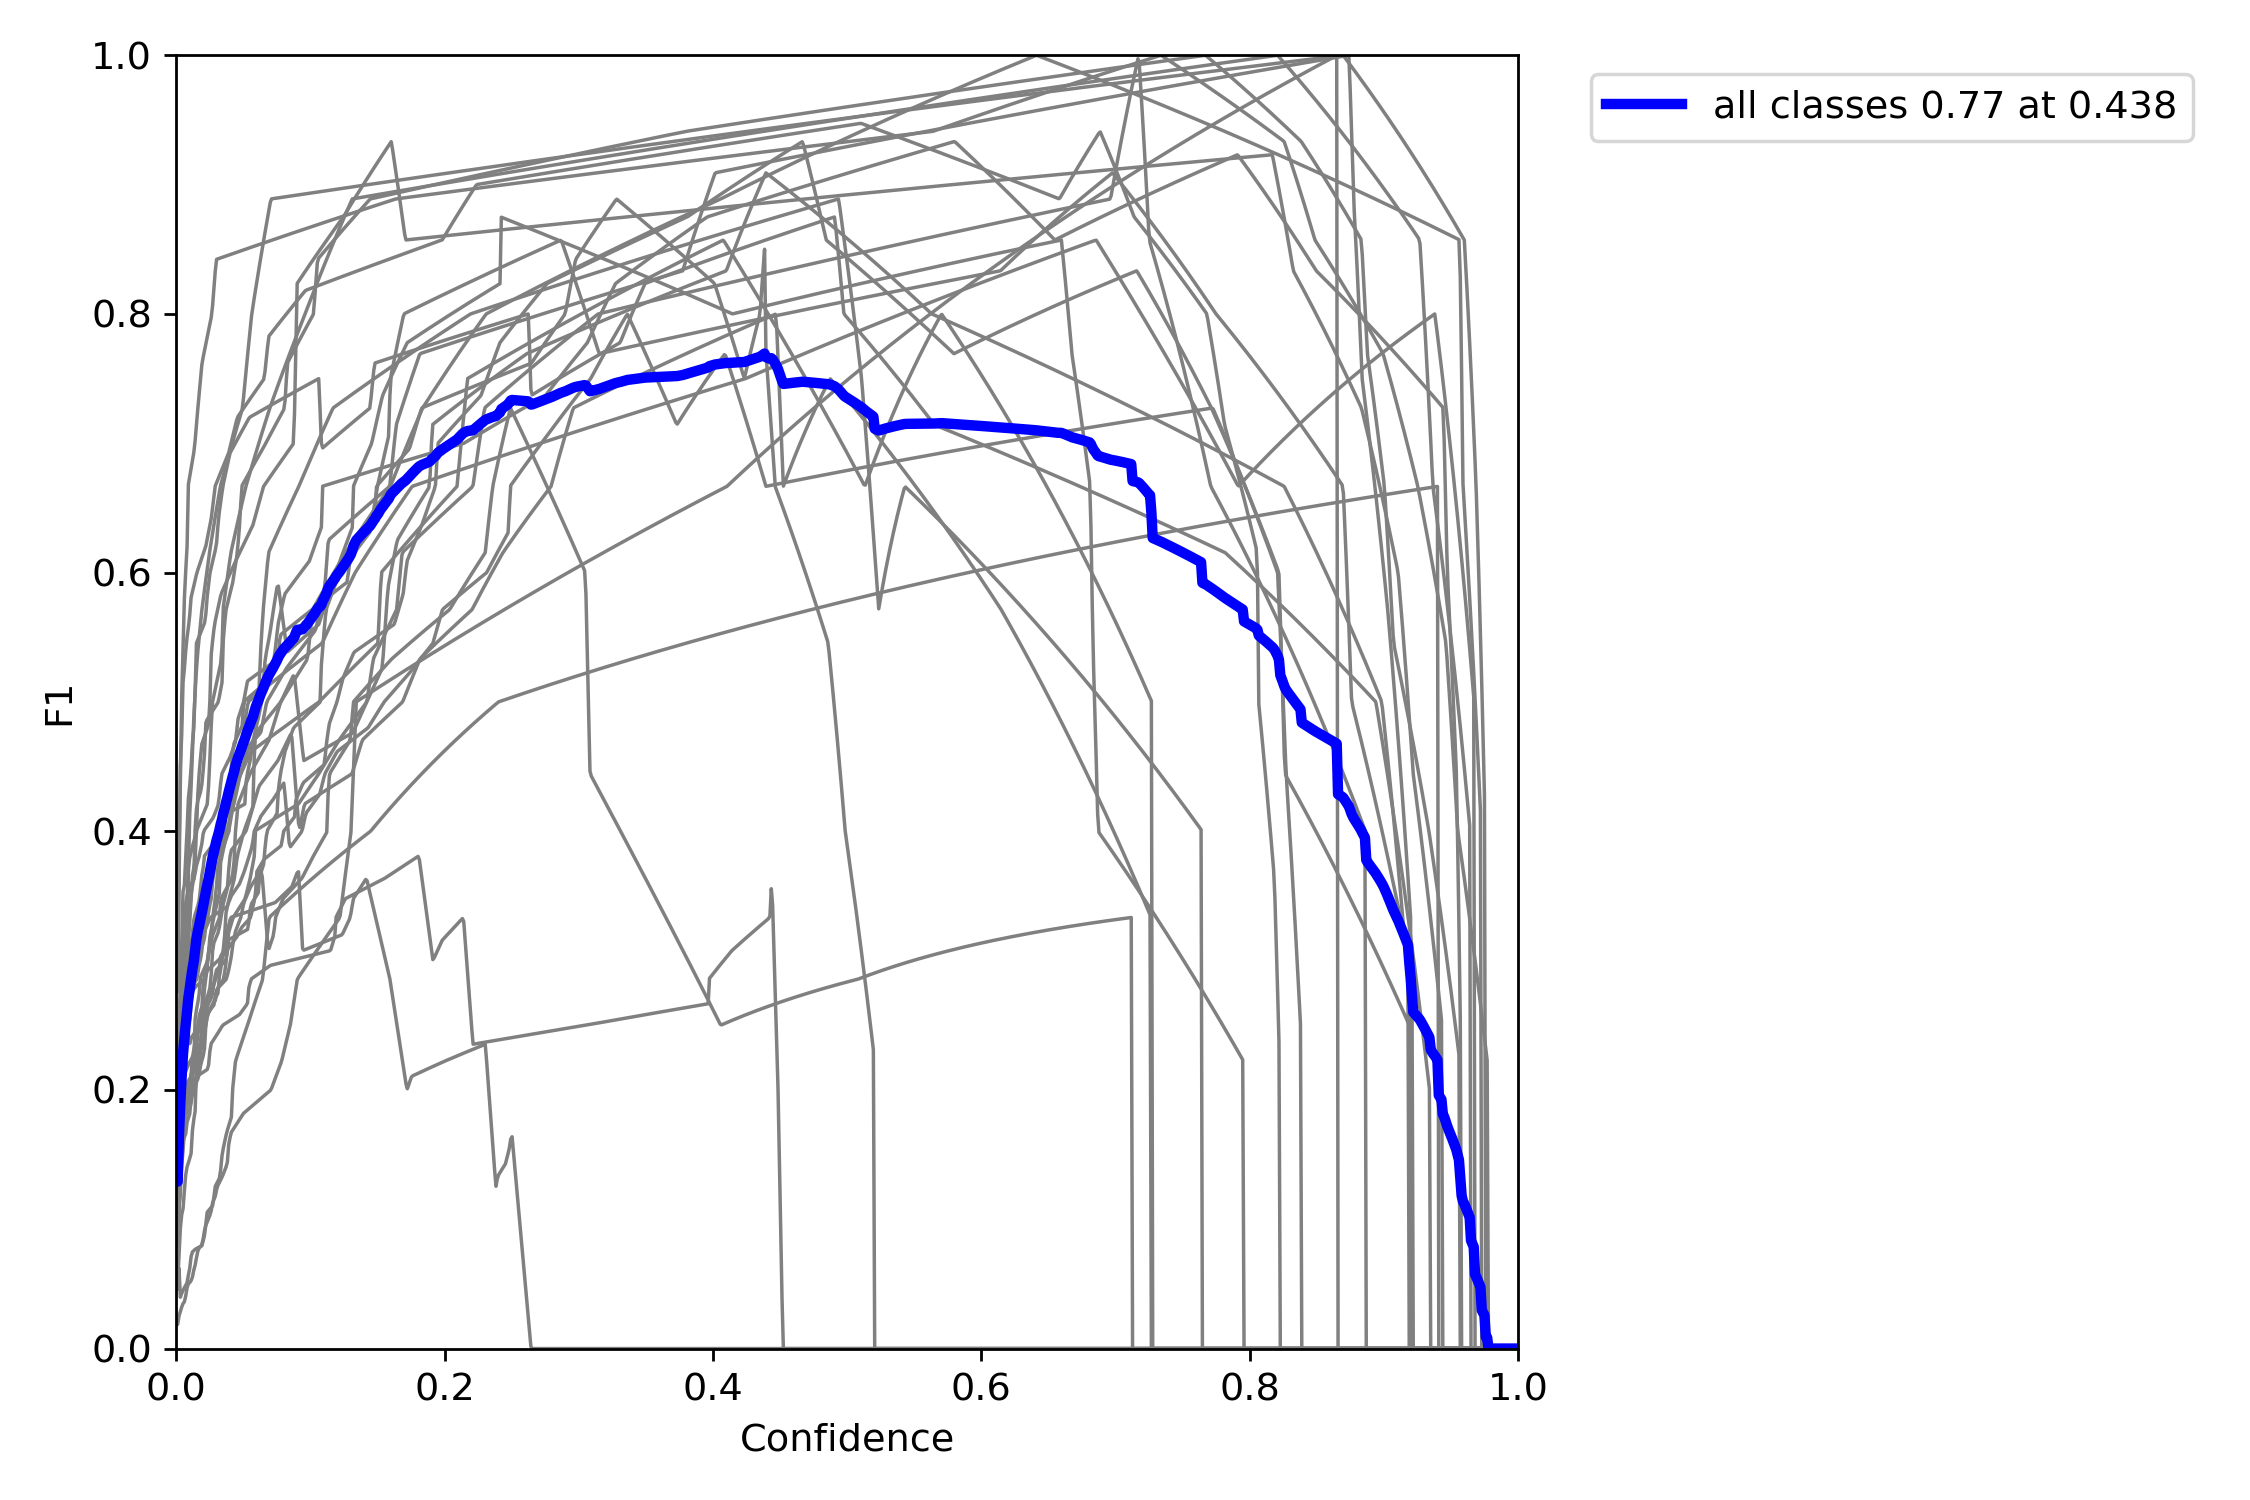

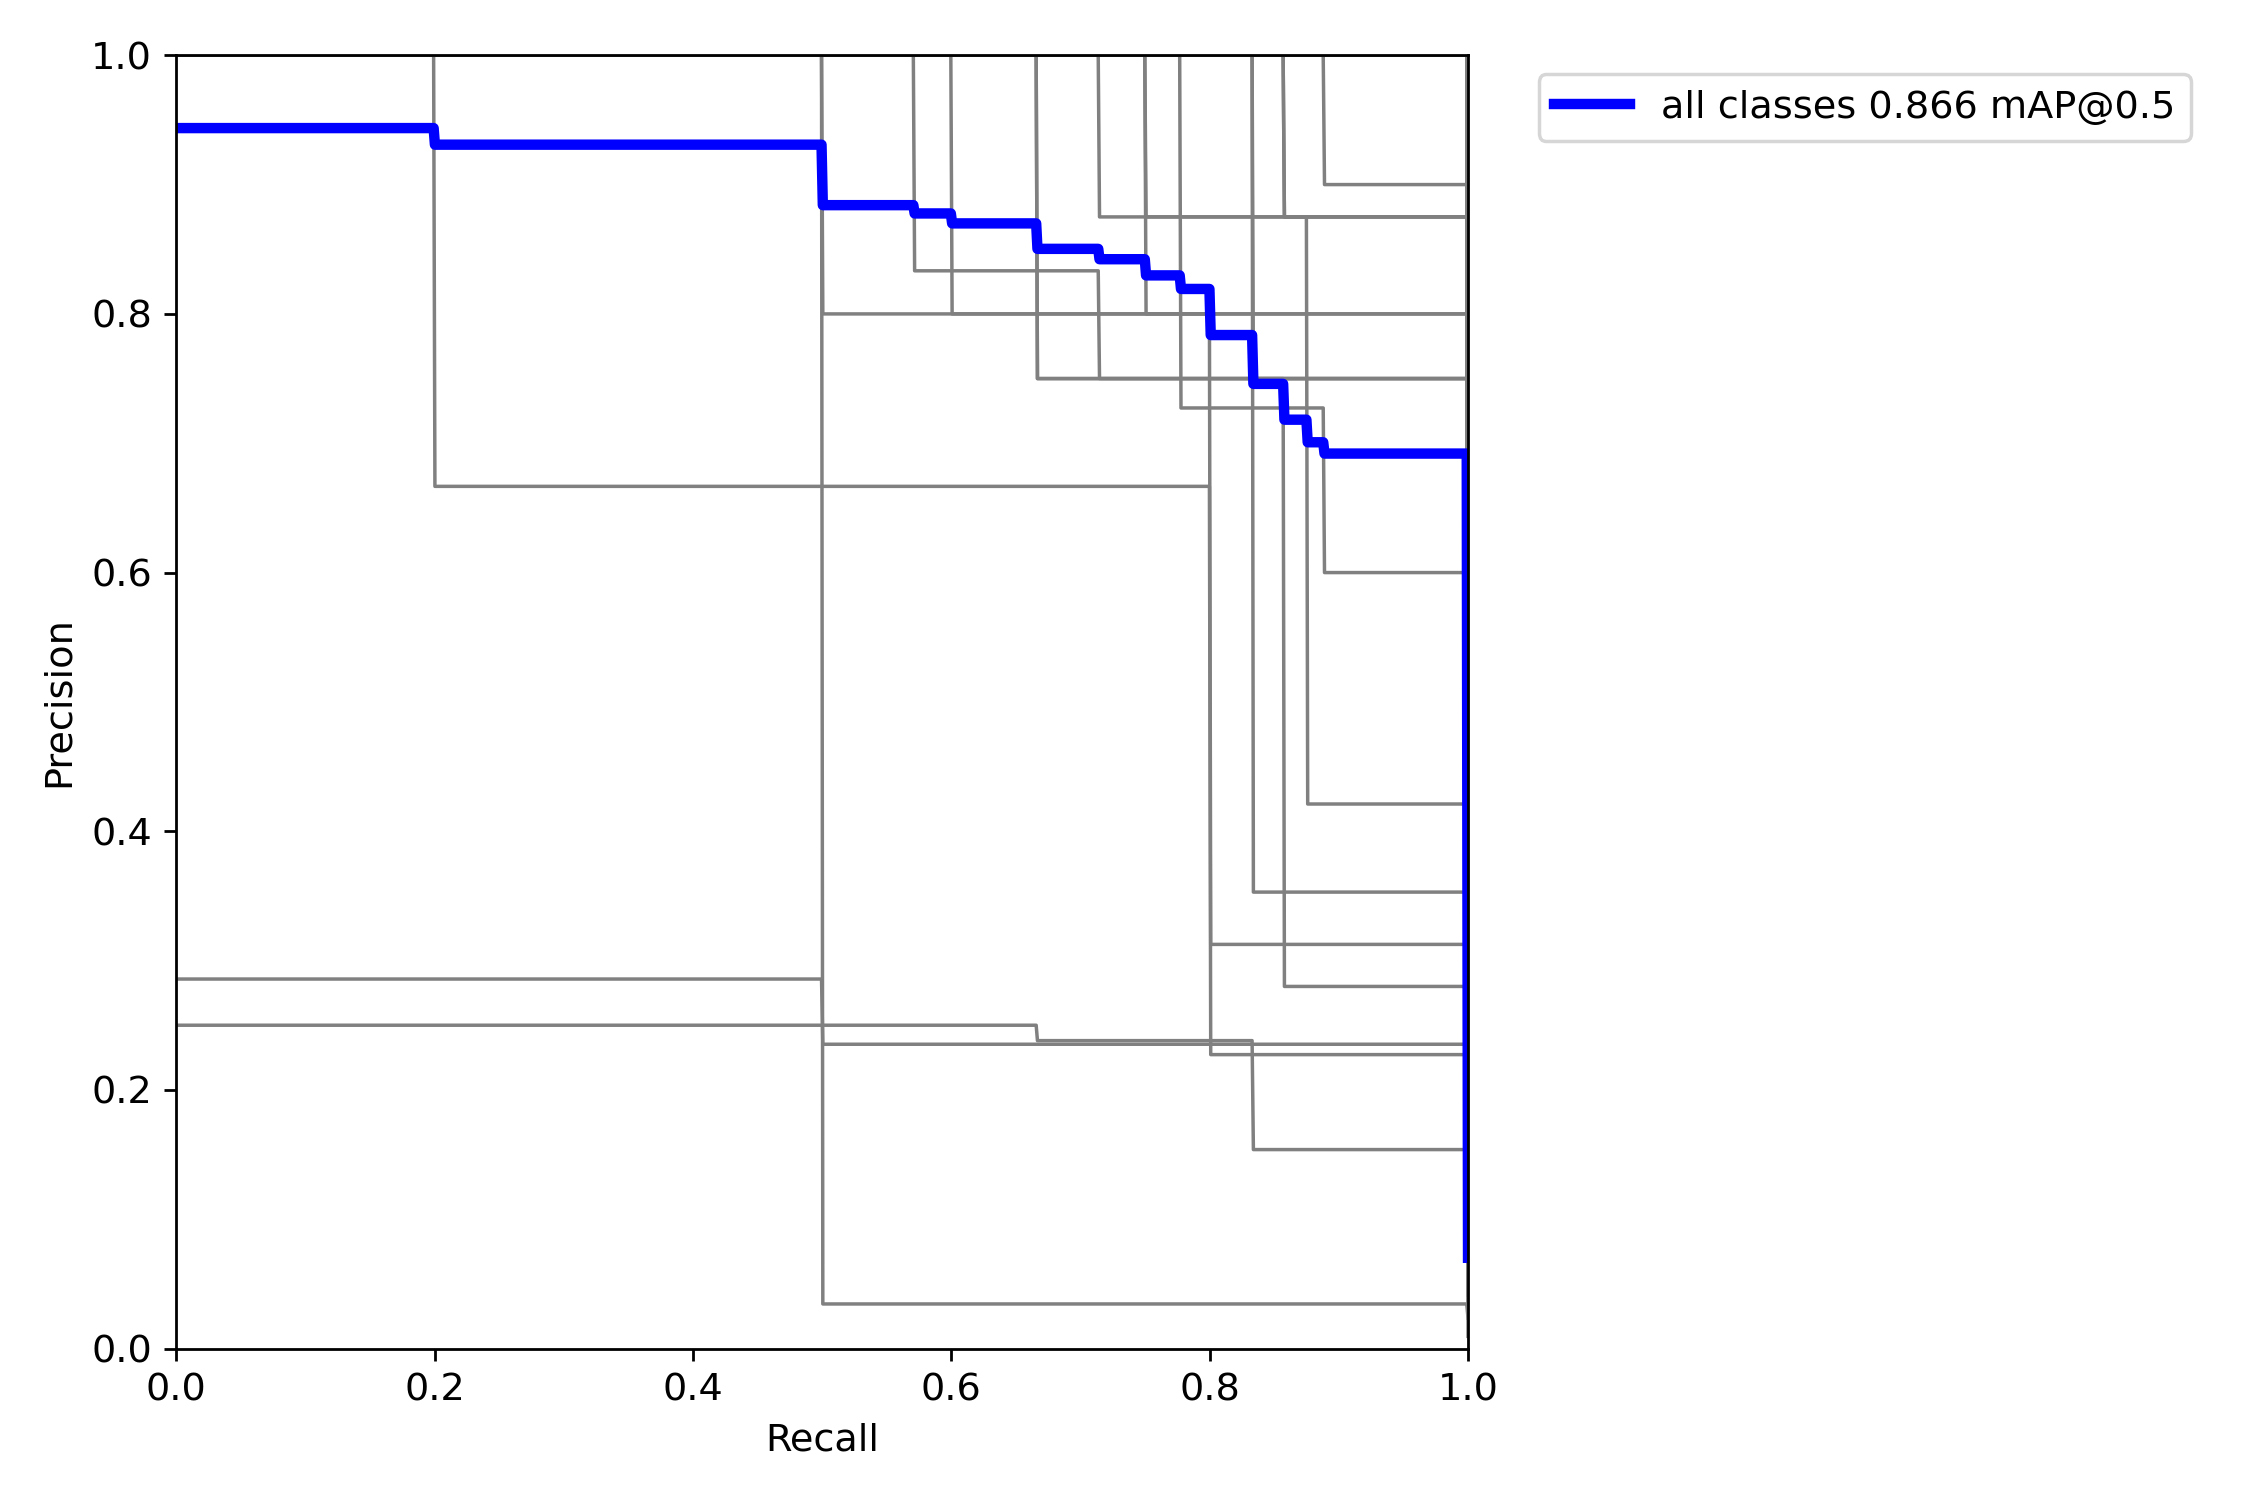

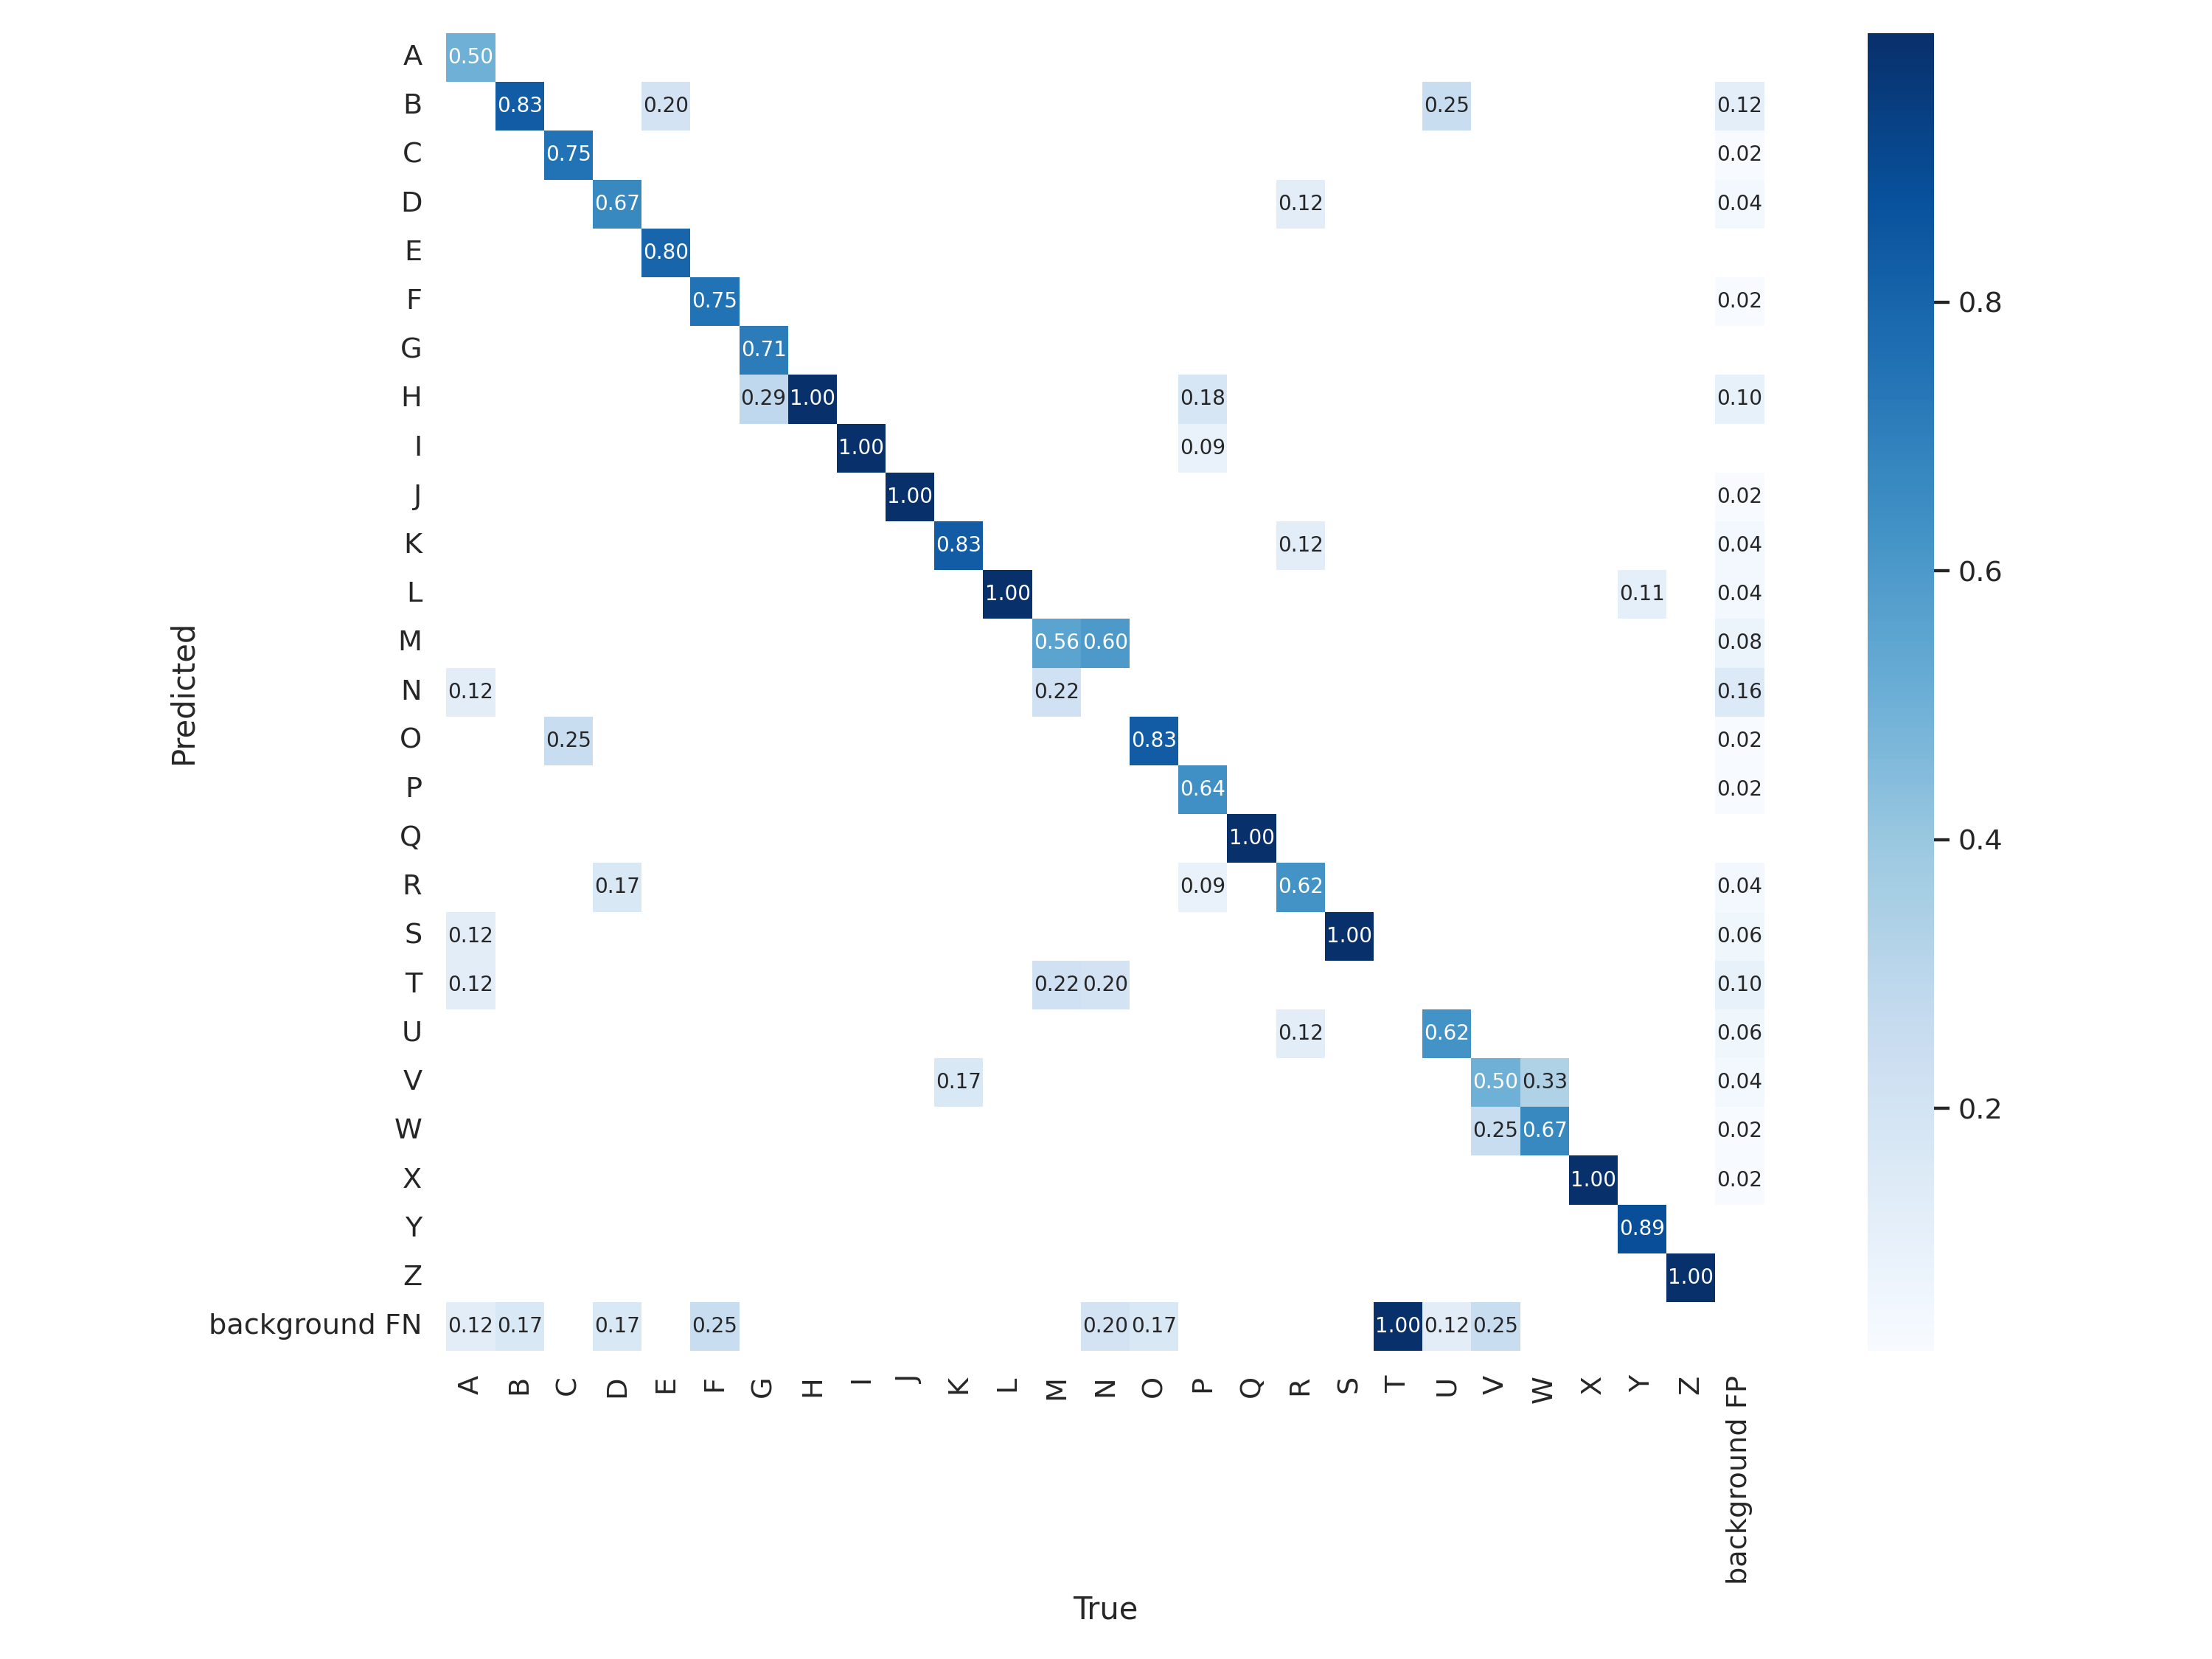

In [6]:
from IPython.display import Image
%cd yolov7
# display(Image("/content/gdrive/MyDrive/yolov7/runs/train/exp4/F1_curve.png", width=800, height=400))
# display(Image("/content/gdrive/MyDrive/yolov7/runs/train/exp4/PR_curve.png", width=800, height=400))
# display(Image("/content/gdrive/MyDrive/yolov7/runs/train/exp4/confusion_matrix.png", width=800, height=800))
display(Image("runs/train/exp23/F1_curve.png", width=800, height=400))
display(Image("runs/train/exp23/PR_curve.png", width=800, height=400))
display(Image("runs/train/exp23/confusion_matrix.png", width=800, height=800))

# Testing

In [7]:
# !python detect.py --weights /content/gdrive/MyDrive/yolov7/runs/train/exp4/weights/epoch_049.pt --conf 0.1 --source /content/gdrive/MyDrive/yolov7/signlanguage-3/test/images
!python detect.py --weights runs/train/exp23/weights/epoch_059.pt --conf 0.1 --source signlanguage-3/test/images

Namespace(weights=['runs/train/exp23/weights/epoch_059.pt'], source='signlanguage-3/test/images', img_size=640, conf_thres=0.1, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

1 A, Done. (701.0ms) Inference, (0.0ms) NMS
 The image with the result is saved in: runs\detect\exp5\A22_jpg.rf.2584deaa261bba945ec5beb1436bed69.jpg
1 B, 1 U, Done. (561.2ms) Inference, (0.0ms) NMS
 The image with the result is saved in: runs\detect\exp5\B14_jpg.rf.316f9f7c75f7bde778f57c62602288cc.jpg
1 B, Done. (566.9ms) Inference, (0.0ms) NMS
 The image with the result is saved in: runs\detect\exp5\B15_jpg.rf.c22d3240fe243dc747817258ca688e7c.jpg
1 B, D

YOLOR  v0.1-104-g941b94c torch 2.3.0+cpu CPU

d:\Dp1\Dp1\.venv\Lib\site-packages\torch\functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3588.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36616622 parameters, 6194944 gradients, 103.6 GFLOPS


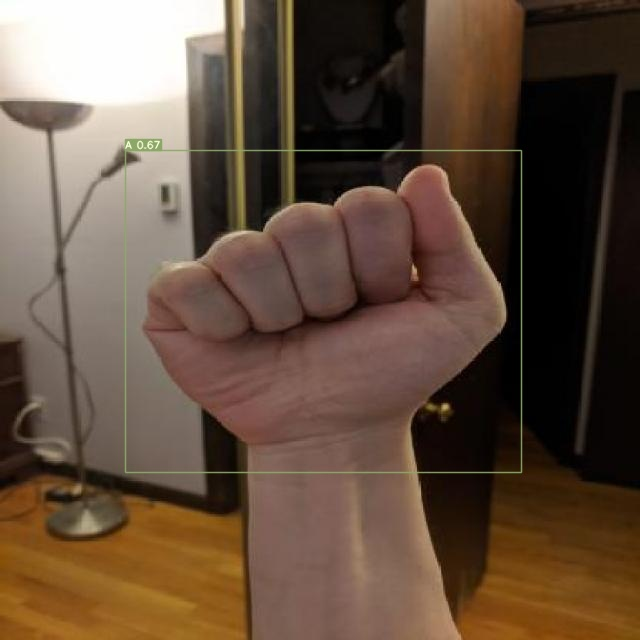

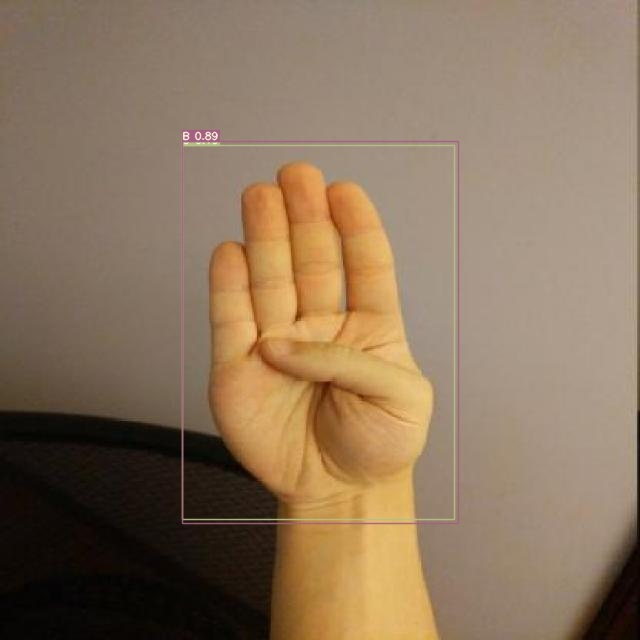

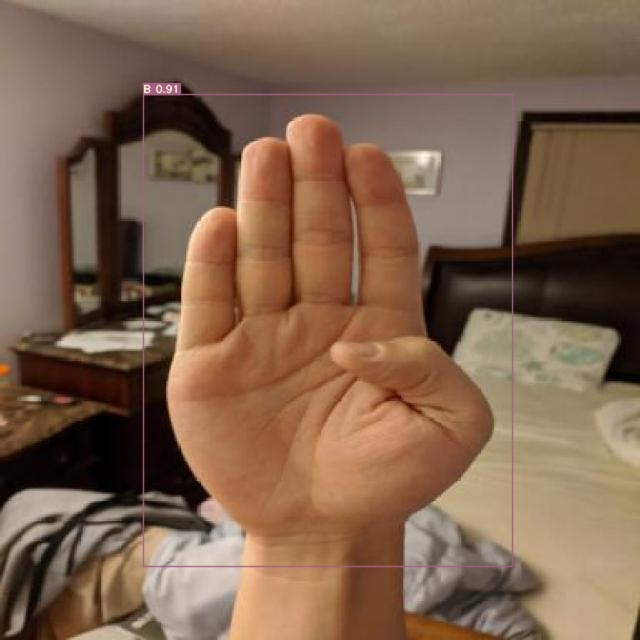

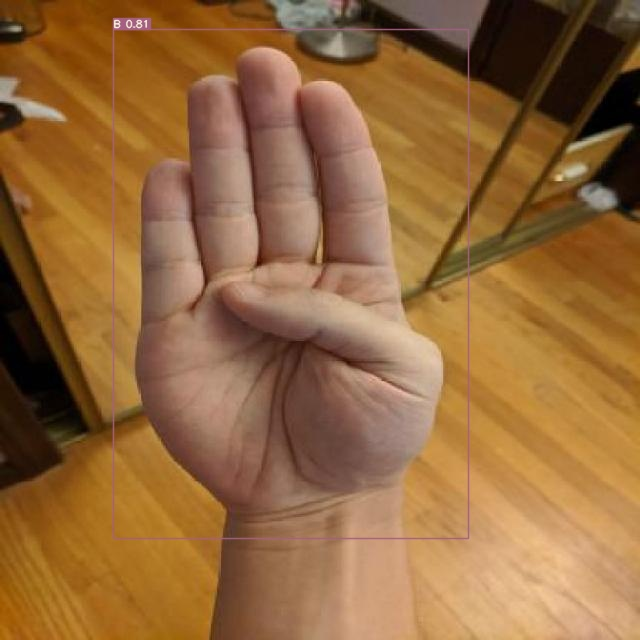

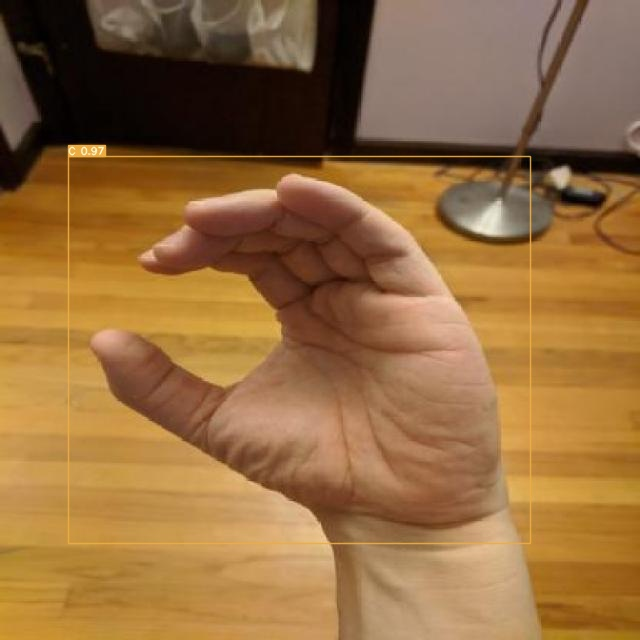

In [11]:
import glob
from IPython.display import Image, display

# i = 0
# limit = 5 # max images to print
# for imageName in glob.glob('/content/gdrive/MyDrive/yolov7/runs/detect/exp/*.jpg'):
#     #Assuming JPG
#     if i < limit:
#       display(Image(filename=imageName))
#       print("\n")
#     i = i + 1

i = 0
limit = 5 # max images to print
for imageName in glob.glob('runs/detect/exp5/*.jpg'):
    #Assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1

We can see some pictures are showing bouding boxes with probabilities of two or more predicted labels, but we want to only show to one with maximum probability, so we may change the threshold value of Non-max supression, and see again. This could be improved in later iterations.